<a href="https://colab.research.google.com/github/nithecs-biomath/mini-schools/blob/main/open_science_zenodo_R_Rmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biodiversity Monitoring using Data Cubes
## Techniques & Applications for Open Science

### Open Science: A practical guide to sharing and disseminating results from Data Cubes

Open Science plays a crucial role in biodiversity monitoring, particularly by fostering collaboration and transparency in research. In the context of our mini-school, "Empowering Biodiversity Monitoring through Data Cubes: Techniques & Applications for Open Science," we emphasize the importance of sharing and disseminating results to maximize the impact of our efforts. By openly sharing data and methodologies, we can enhance the reproducibility of scientific findings, encourage broader participation, and accelerate discoveries in biodiversity conservation. Our hands-on session will introduce participants to GitHub for version control and collaboration, and Zenodo for archiving and sharing research outputs, ensuring that all contributions are freely accessible for future use.

### Background Information

Open science is a movement that emphasizes making scientific research more transparent, accessible, and reproducible. In biodiversity research, this approach is particularly critical as it enables broader participation, enhances collaboration, and supports sustainable development goals (SDGs), especially SDG 17: Partnerships for the Goals, which encourages collaboration for solving global challenges. The rise of data cubes in biodiversity monitoring offers a practical opportunity to apply open science principles, ensuring that research outputs—data, code, and results—are available for reuse, validation, and further exploration.  


**Open Science Principles**:
1. **Transparency**: Sharing all aspects of the research process, from data collection and methodologies to results and interpretations, allows other researchers to understand how conclusions are reached.
2. **Accessibility**: Ensuring that data, publications, and other research outputs are openly accessible to all stakeholders, including researchers, policymakers, and the public.
3. **Reproducibility**: Facilitating the ability for others to replicate findings by providing complete datasets, code, and workflows. This is critical for ensuring the robustness of biodiversity research.

### Tools for Open Science in Biodiversity Monitoring

1. **GitHub**:  
   GitHub is a widely used platform for version control and sharing code. It allows researchers to store, manage, and share code for analyses, as well as documentation and tutorials. GitHub repositories can be linked to services like Zenodo to generate Digital Object Identifiers (DOIs), which formalize citation and credit for code and datasets.

2. **Zenodo**:  
   Zenodo is an open-access repository developed by CERN, designed to store and share research outputs, including datasets, code, and publications. It allows researchers to easily archive their research in compliance with Open Science mandates and provides DOIs to ensure proper citation.

3. **GBIF (Global Biodiversity Information Facility)**:  
   GBIF is a global database that allows sharing and accessing biodiversity data. Researchers can upload occurrence data from their studies and also retrieve datasets for analysis, ensuring transparency and accessibility in data sharing.

4. **Dryad**:  
   Dryad is a curated resource for the open publication of datasets. It specializes in datasets related to biology and ecology, ensuring that research data is well-preserved, accessible, and easily citable.

5. **Figshare**:  
   Figshare is another general-purpose open repository where researchers can share research data, figures, and even entire projects. It provides detailed metadata and generates DOIs for uploaded content, promoting reuse and citation.

6. **OpenAIRE**:  
   OpenAIRE is an open science infrastructure that supports the European Commission’s Open Science agenda. It provides a platform for publishing and sharing research outputs, with a focus on making research easily accessible and interoperable.

7. **Open Research Europe**:  
   This platform offers open access to articles across a wide range of disciplines, including biodiversity. It emphasizes immediate publication followed by open peer review, promoting transparency and accessibility in scientific communication.

8. **DataONE**:  
   DataONE provides access to earth and environmental data from various repositories. It promotes best practices in data management, ensuring that data is shared in a way that supports reproducibility and reuse in biodiversity research.

9. **OSF (Open Science Framework)**:  
   OSF is a platform for managing, sharing, and registering research projects. It allows researchers to share their work at any stage, from initial planning and data collection to analysis and publication.


### Best Practices for Open Science in Biodiversity Research

- **Pre-registration**: Documenting research hypotheses, methodologies, and analysis plans before data collection helps prevent bias and ensures transparency.
- **Sharing Data and Code**: Releasing datasets and code alongside publications ensures that others can validate and build on the research. Using repositories like GitHub, Zenodo, and GBIF helps promote reuse.
- **Documentation and Metadata**: Providing thorough documentation, including metadata, enhances the accessibility and usability of shared resources.
- **Collaborative Platforms**: Tools like GitHub, OSF, and DataONE allow for ongoing collaboration and version control, ensuring that research remains transparent throughout its lifecycle.

By incorporating these tools and principles, this final lecture will provide a comprehensive understanding of how open science enhances biodiversity monitoring, making research outputs more impactful, collaborative, and aligned with global sustainability goals.

### Hands-on with R in Colab

#### Install missing libraries

In [ ]:
# Install necessary packages
if (!requireNamespace("httr", quietly = TRUE)) {
  install.packages("httr")
}
if (!requireNamespace("jsonlite", quietly = TRUE)) {
  install.packages("jsonlite")
}
if (!requireNamespace("sf", quietly = TRUE)) {
  install.packages("sf")
}
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}

#### Other potentially useful libraries

In [ ]:
# Install required packages
# install.packages("zen4R")

# install.packages("zip")
# install.packages("tmap") # Has a lot of dependencies
# install.packages("reticulate")


In [ ]:
# Load necessary libraries
# library(zen4R)
library(ggplot2)  # For plotting
library(sf)       # For working with GeoPackage files

library(httr)
library(jsonlite)
library(zip)      # For unzipping the file
# library(tmap)     # Alternative plotting

library(tidyr)   # For separating columns
library(dplyr)   # For data manipulation if needed
# library(reticulate)
library(data.table)

library(utils) # Add utils for unzip


Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE


Attaching package: ‘zip’


The following objects are masked from ‘package:utils’:

    unzip, zip



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




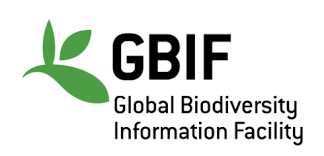

In [ ]:
# Function to load a CSV file from a URL inside a ZIP
load_from_url_zip <- function(zip_url) {
  # Make an HTTP request to download the file
  response <- GET(zip_url)

  if (status_code(response) == 200) {
    # Write the content to a temporary file
    temp <- tempfile(fileext = ".zip")
    writeBin(content(response, "raw"), temp)

    # Use utils::unzip to explicitly call the function from the utils package
    csv_files <- utils::unzip(temp, list = TRUE)  # Add 'list = TRUE' to get file names

    # Find the CSV file in the list (using file name instead of connection)
    csv_file <- csv_files$Name[grepl("\\.csv$", csv_files$Name)]

    # Extract the CSV file to a temporary location
    utils::unzip(temp, csv_file, exdir = tempdir()) # Explicit call

    # Construct the full path to the extracted CSV file
    csv_path <- file.path(tempdir(), csv_file)

    # Read the CSV file using the extracted file path
    df <- fread(csv_path, sep = "\t", fill = TRUE, data.table = FALSE)

    # Remove temporary files
    unlink(temp)
    unlink(csv_path)

    return(df)
  } else {
    print(paste("Failed to download the file. Status code:", status_code(response)))
    return(NULL)
  }
}

In [ ]:
# URL path for the GBIF occurrence download
url_zip <- 'https://api.gbif.org/v1/occurrence/download/request/0038969-240906103802322.zip'

# Run the function to load the data
df_url <- load_from_url_zip(url_zip)

# Specify the columns to keep
if (!is.null(df_url)) {
  df_url <- df_url[, c("year", "month", "family", "speciesKey", "species", "decimalLatitude", "decimalLongitude")]
  head(df_url, 4)
}

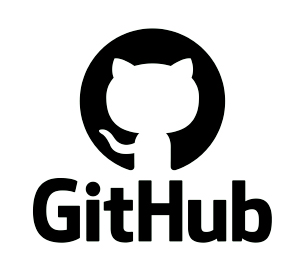

In [ ]:
# Read the CSV file from GitHub with tab delimiter
za_data <- read.delim('https://raw.githubusercontent.com/nithecs-biomath/mini-schools/refs/heads/main/data/sample_data_SA.csv', sep = '\t')
head(za_data)


In [ ]:
# Split 'yearmonth' into separate 'year' and 'month' columns
za_data <- za_data %>%
  separate(yearmonth, into = c("year", "month"), sep = "-")

# Preview the first 4 rows of the data
head(za_data, 4)

In [ ]:
data_csv <- read.delim('https://raw.githubusercontent.com/nithecs-biomath/mini-schools/refs/heads/main/data/0038969-240906103802322.csv', sep = '\t')
head(data_csv, 4)

In [ ]:
# Assuming df_url is already loaded as a data frame
# Select the columns to keep
data_csv <- data_csv %>%
  select(year, month, family, speciesKey, species, decimalLatitude, decimalLongitude)

# View the first 4 rows of the resulting data frame
head(data_csv, 4)

In [ ]:
# Convert to sf object
species_points <- st_as_sf(data_csv, coords = c("decimalLongitude", "decimalLatitude"), crs = 4326)
print(head(species_points, 4))

# Create the quarter-degree grid over the area of interest
# Get the extent (bounding box) of the points
bounds <- st_bbox(species_points)
print(head(bounds))

In [ ]:
# Define cell size (0.25 for quarter-degree)
cell_size <- 0.25

# Create the grid (xmin, ymin, xmax, ymax)
grid <- st_make_grid(
  species_points,
  cellsize = c(cell_size, cell_size),
  square = TRUE,
  what = "polygons"
)

# Convert grid to an sf object and assign grid IDs
grid_sf <- st_sf(geometry = grid)
grid_sf$gridID <- 1:nrow(grid_sf)
print(head(grid_sf))

# Perform spatial join to assign species to grid cells
species_in_grid <- st_join(species_points, grid_sf, left = FALSE)
print(head(species_in_grid))


In [ ]:
# Count unique species per grid cell
species_count <- species_in_grid %>%
  group_by(gridID) %>%
  summarise(unique_species = n_distinct(species))
print(head(species_count))


In [ ]:
# Perform spatial join to assign species to grid cells
count_in_grid <- st_join(grid_sf, species_count, left = FALSE)
print(head(count_in_grid))

In [ ]:
# Clear the current plot page (if needed)
# grid::grid.newpage()

# Plot the grid with colors representing the count of unique species
ggplot() +
  geom_sf(data = count_in_grid, aes(fill = unique_species)) +
  scale_fill_viridis_c(option = "viridis", direction=-1) + # Color scale for better visual representation
  theme_minimal() +
  ggtitle("Quarter-Degree Grid: Count of Unique Species")

In [ ]:
# Increase plot size within Colab
options(repr.plot.width = 12, repr.plot.height = 12)

# Plot the grid with colors representing the count of unique species
ggplot() +
  geom_sf(data = count_in_grid, aes(fill = unique_species)) +

  # Custom color gradient: blue, green, yellow, orange, red
  scale_fill_gradientn(colors = c("blue", "green", "yellow", "orange", "red")) +

  # Adjust plot size for larger display in Colab
  theme_minimal() +
  ggtitle("Quarter-Degree Grid: Count of Unique Species") +

  # Use theme to adjust the plot size
  theme(
    plot.title = element_text(size = 20, face = "bold"),  # Increase title size
    legend.title = element_text(size = 14),               # Increase legend title size
    legend.text = element_text(size = 12),                # Increase legend text size
    axis.title = element_text(size = 14),                 # Increase axis title size
    axis.text = element_text(size = 12),                  # Increase axis text size
    plot.margin = margin(10, 10, 10, 10),                 # Add margin for better visibility
    plot.background = element_rect(fill = "white")        # Make sure the background is white
  )

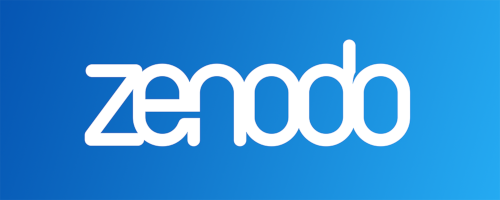

In [ ]:
# Define the download URL for the CSV file
file_url <- "https://zenodo.org/records/8299696/files/WesternIndianOceanCoralDiversity.csv?download=1"
file_name <- "WesternIndianOceanCoralDiversity.csv"

# Download the file from Zenodo
download.file(file_url, destfile = file_name)

# Load the dataset (assuming it's a CSV file)
data <- read.csv(file_name)

# View the first few rows of the data
print(head(data, 4))

In [ ]:
# Define Zenodo API URL and dataset DOI
zenodo_api_url <- "https://zenodo.org/api/records/"
record_id <- "8299696"  # Record ID for your specific dataset

# Fetch the metadata for the Zenodo record
response <- GET(paste0(zenodo_api_url, record_id))
metadata <- fromJSON(content(response, as = "text", encoding = "UTF-8"))

# View the metadata
# print(metadata)

In [31]:
# Check the files available in this record
files <- metadata$files
# print(files)
str(files)

In [32]:
# Find the CSV file in the record
csv_row_index <- which(grepl("\\.csv$", files$key))  # Find the row index of the CSV file
csv_file_url <- files[csv_row_index, "links"]$self # Extract the download URL
csv_filename <- files[csv_row_index, "key"]        # Extract the filename

# Print the extracted information
print(csv_file_url)
print(csv_filename)


In [33]:
# Download the file from Zenodo
download.file(csv_file_url, destfile = csv_filename)

# Load the dataset (assuming it's a CSV file)
data <- read.csv(csv_filename)

# View the first few rows of the data
print(head(data))

## BONUS SECTION

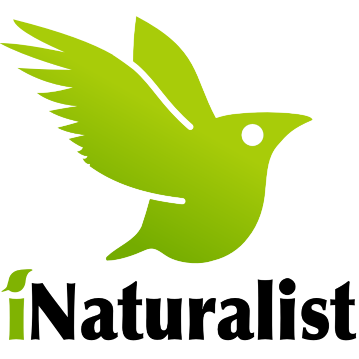

In [37]:
# Install necessary packages
if (!requireNamespace("rinat", quietly = TRUE)) {
  install.packages("rinat")
}
if (!requireNamespace("lubridate", quietly = TRUE)) {
  install.packages("lubridate")
}
if (!requireNamespace("rnaturalearth", quietly = TRUE)) {
  install.packages("rnaturalearth")
}
if (!requireNamespace("rnaturalearthdata", quietly = TRUE)) {
  install.packages("rnaturalearthdata")
}

In [39]:
library(rinat)
library(lubridate)
library(rnaturalearth)
library(rnaturalearthdata)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘rnaturalearthdata’


The following object is masked from ‘package:rnaturalearth’:

    countries110




In [ ]:
# # Step 1: Download iNaturalist observations for South Africa
# inat_data <- get_inat_obs(place_id = 6986, maxresults = 500)
# print(head(inat_data, 2))


In [40]:
# Step 1: Download iNaturalist observations for South Africa
inat_data <- data.frame()  # Initialize an empty data frame

for (year in 2012:2023) {  # Loop through years (adjust years as needed)
  for (month in 1:12) {  # Loop through months
    # Download observations for the current year and month
    temp_data <- get_inat_obs(
      place_id = 6986,
      maxresults = 50,    # Reduced maxresults
      year = year,        # Added year filter
      month = month       # Added month filter
    )

    # Append the filtered data to the main data frame
    inat_data <- rbind(inat_data, temp_data)

    # Print progress to monitor the loop
    print(paste("Downloaded data for:", year, "-", month))
  }
}

[1] "Downloaded data for: 2012 - 1"
[1] "Downloaded data for: 2012 - 2"
[1] "Downloaded data for: 2012 - 3"
[1] "Downloaded data for: 2012 - 4"


ERROR: Error in curl::curl_fetch_memory(url, handle = handle): Operation was aborted by an application callback


In [ ]:
print(head(inat_data, 4))

                 scientific_name                  datetime description
1 Oenanthe familiaris familiaris 2012-01-04 12:01:00 +0200        <NA>
2       Thalasseus bergii bergii 2012-01-04 11:48:00 +0200        <NA>
3               Buteo trizonatus 2012-01-04 18:31:00 +0200        <NA>
4   Damaliscus pygargus pygargus 2012-01-04 18:45:00 +0200        <NA>
                          place_guess  latitude longitude tag_list
1 Cape Point, Cape Town, South Africa -34.25883  18.38228     <NA>
2     Olifantsbos Beach, South Africa -34.25785  18.38209     <NA>
3 Cape Point, Cape Town, South Africa -34.27460  18.45373     <NA>
4 Cape Point, Cape Town, South Africa -34.25685  18.38615     <NA>
                            common_name
1                    Cape Familiar Chat
2 Southern African Greater Crested Tern
3                        Forest Buzzard
4                              Bontebok
                                                 url
1 https://www.inaturalist.org/observations/248719012
2 ht

In [ ]:
# Step 2: Filter out records without coordinates and dates
inat_data <- inat_data %>%
  filter(!is.na(longitude) & !is.na(latitude) & !is.na(observed_on))
print(dim(inat_data))

# Step 3: Extract year from the date and calculate species richness
inat_data <- inat_data %>%
  mutate(year = year(observed_on)) # Extract year from observed_on
print(dim(inat_data))

[1] 7200   37
[1] 7200   38


In [34]:
# Step 6: Load the map data for South Africa
south_africa <- ne_countries(scale = "medium", country = "South Africa", returnclass = "sf")
# names(south_africa)

ERROR: Error in ne_countries(scale = "medium", country = "South Africa", returnclass = "sf"): could not find function "ne_countries"


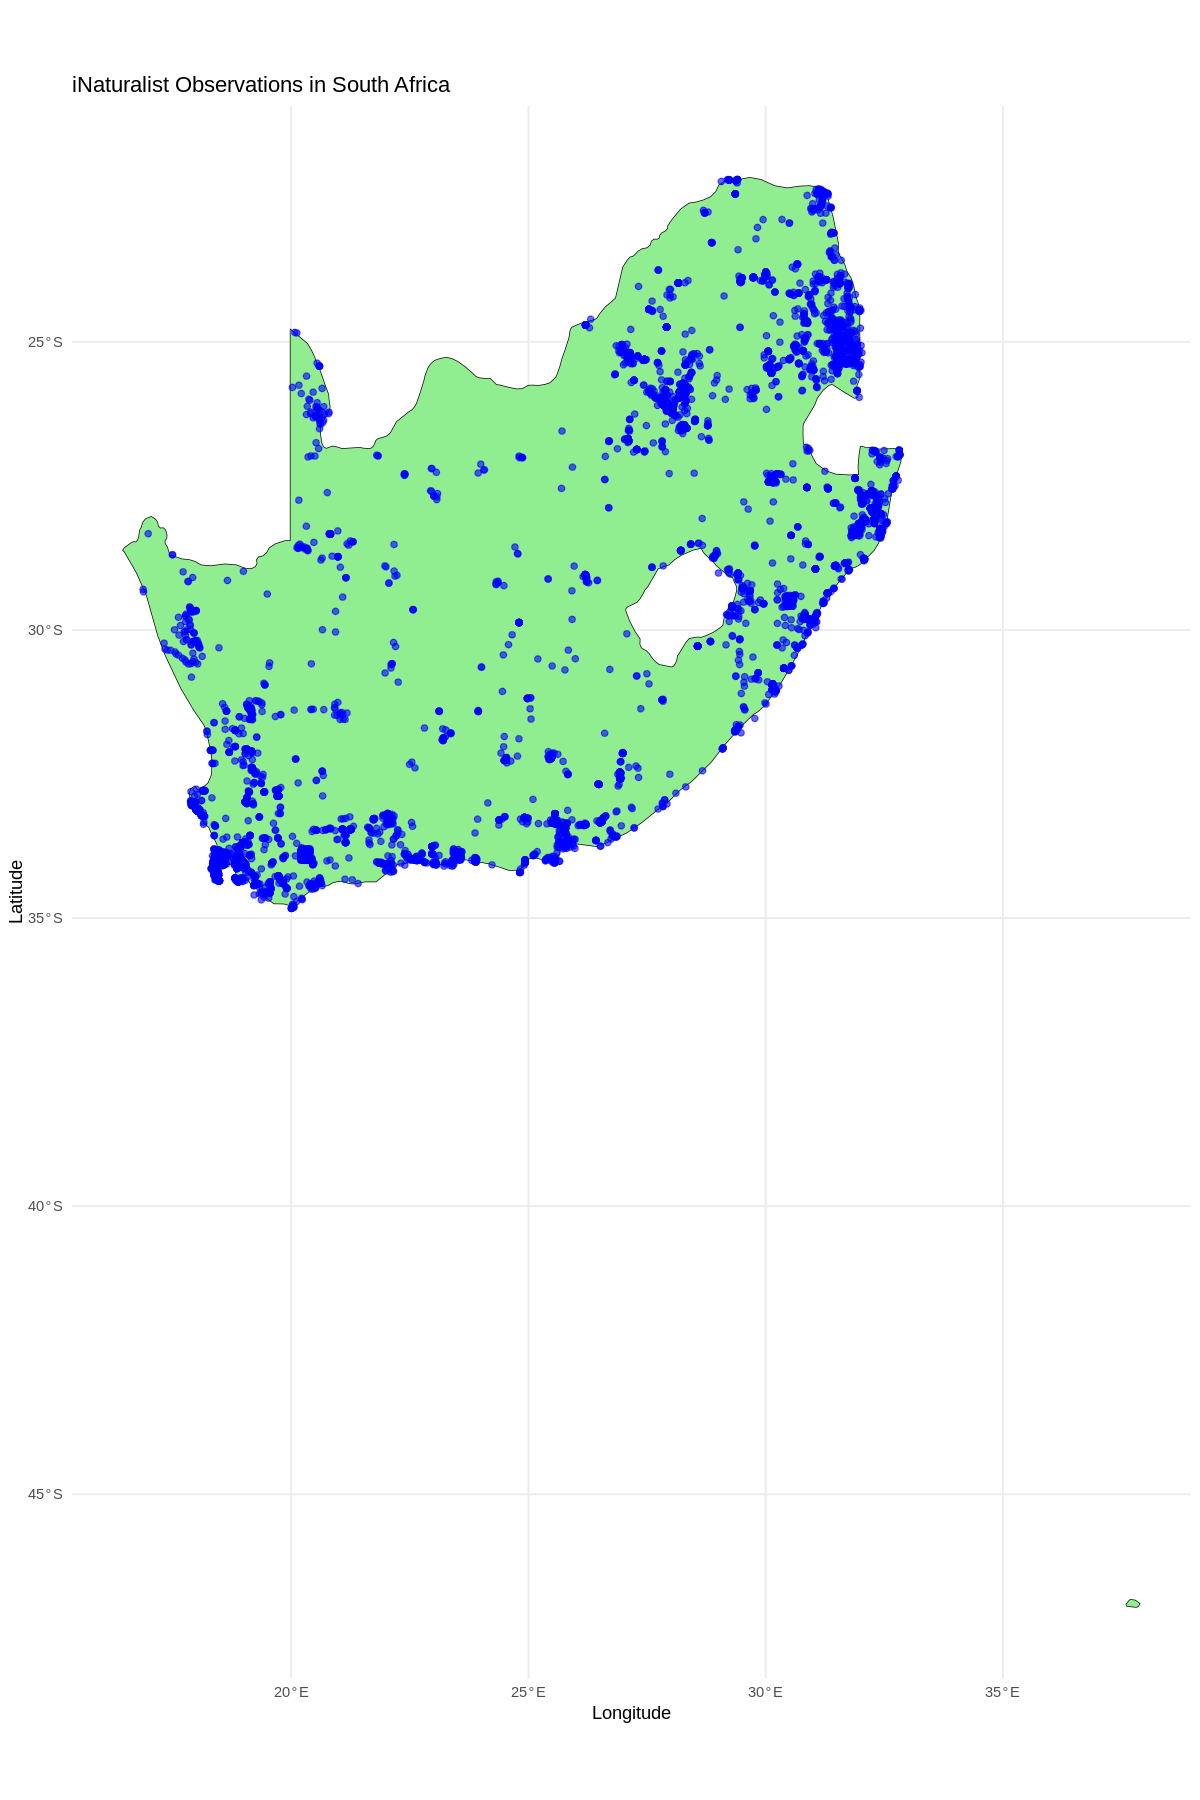

In [ ]:
# Increase plot size within Colab
options(repr.plot.width = 10, repr.plot.height = 15)

# Step 4: Plot iNaturalist records on a map
ggplot() +
  geom_sf(data = south_africa, fill = "lightgreen", color = "black") +
  geom_point(data = inat_data, aes(x = longitude, y = latitude), color = "blue", alpha = 0.6) +
  labs(title = "iNaturalist Observations in South Africa",
       x = "Longitude", y = "Latitude") +
  theme_minimal()

In [ ]:
# Step 5: Group by year and calculate species richness and observation count per year
yearly_stats <- inat_data %>%
  group_by(year) %>%
  summarise(
    species_richness = n_distinct(scientific_name),  # Unique species count
    observation_count = n()  # Total observations
  ) %>%
  ungroup()

# Step 5: Add confidence intervals based on observation count
# Assuming we can use a basic approximation for CI: 1.96 * (species richness / sqrt(observation count))
yearly_stats <- yearly_stats %>%
  mutate(
    ci_upper = species_richness + 1.96 * (species_richness / sqrt(observation_count)),
    ci_lower = species_richness - 1.96 * (species_richness / sqrt(observation_count))
  )

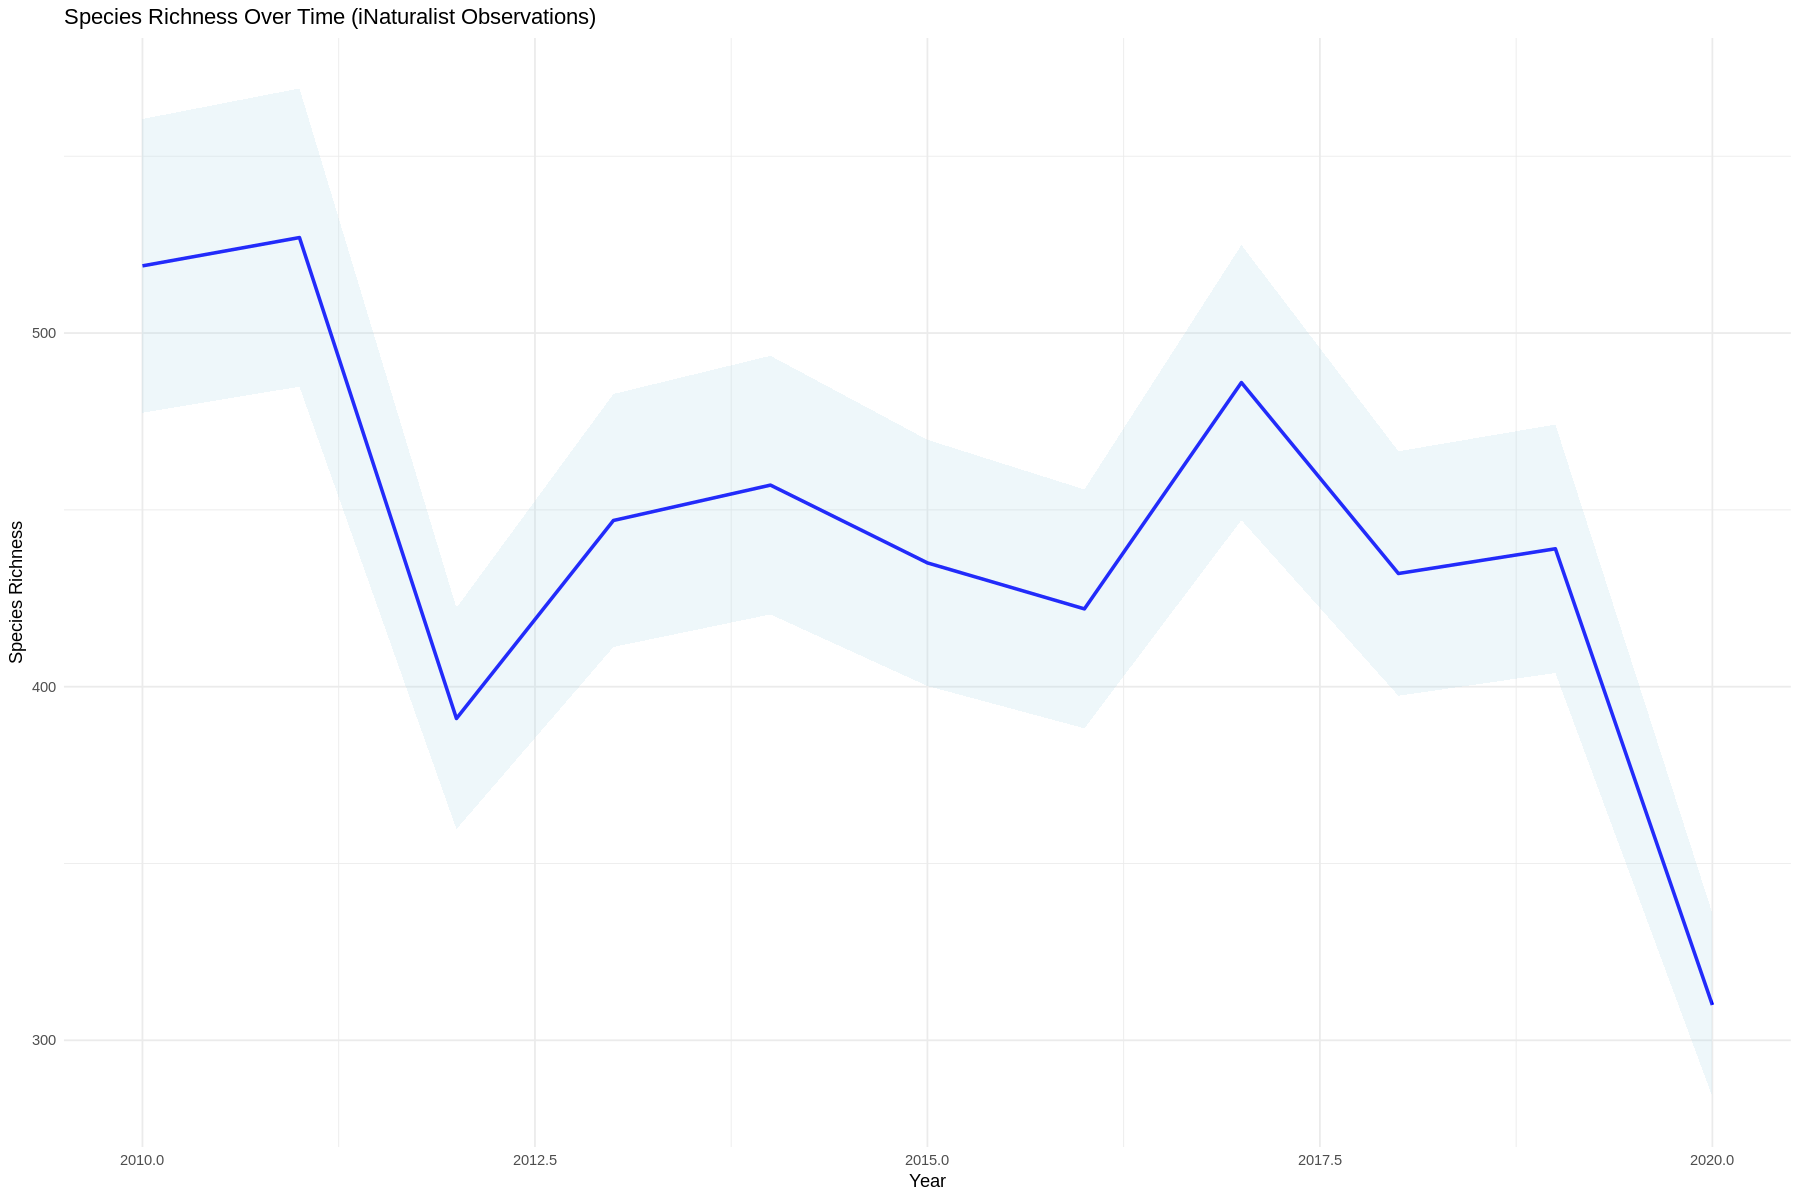

In [ ]:
# Increase plot size within Colab
options(repr.plot.width = 15, repr.plot.height = 10)

# Step 6: Plot the species richness over time with confidence intervals
ggplot(yearly_stats, aes(x = year, y = species_richness)) +
  geom_line(color = "blue", size = 1) +
  geom_ribbon(aes(ymin = ci_lower, ymax = ci_upper), alpha = 0.2, fill = "lightblue") +
  labs(title = "Species Richness Over Time (iNaturalist Observations)",
       x = "Year", y = "Species Richness") +
  theme_minimal()

This code demonstrates how to retrieve data from Zenodo using the Zenodo API in R. It provides the basic steps for accessing metadata and downloading files linked to a Zenodo dataset.